In [1]:
#!pip

## r1_correctLC

In [2]:
from astropy import stats #for MAD

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from lightkurve import LightCurve
import astropy.units as u
import logging
#import batman-package as batman
#batman = __import__("batman-package")
import matplotlib
#from basic_functions import stop

logging.basicConfig(format='%(asctime)s %(levelname)s: %(name)s(%(funcName)s): %(message)s', level=logging.DEBUG)

import tessutils #NOT the normal utils!

#dataDir = "data"
#downloadDir = "mastDownload/TESS"
#outdir = "results_notCorrectedForSineLong"
#correctSine = False

###################################################################################################


2019-11-18 15:34:25,428 DEBUG: matplotlib.pyplot(switch_backend): Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [4]:
import matplotlib.pyplot as plt
from astropy.table import Table
import astropy.units as u
from astropy.io import fits 
import os
from lightkurve import LightCurve
import numpy as np
import requests
import gzip 
import pickle

import logging
logger = logging.getLogger(__name__)

import subprocess
from matplotlib import rc

import os
import shutil

In [5]:
lc = None
folderName = 'tess2018206045859-s0001-0000000092352620-0120-s'
downloadDir = 'CleanPath/LowMags/TIC_92352620/' #Path must flow like this

lc, sectors = tessutils.loadLC(folderName, downloadDir, fluxType="PDCSAP", normalised=True)
lcOri = lc.copy()

# Show what it looks like
#plt.figure()
#plt.scatter(lc.time, lc.flux, label="LC", marker='.', s=5)
#lcB = lc.bin(100, method="median")
#plt.scatter(lcB.time, lcB.flux, label="LC", marker='.', s=5)
#plt.savefig(os.path.join(downloadDir, "TIC_92352620_raw.pdf"))
#plt.show()

2019-11-18 15:34:25,680 INFO: tessutils(loadLC): Cadence is 2 min for CleanPath/LowMags/TIC_92352620/tess2018206045859-s0001-0000000092352620-0120-s\tess2018206045859-s0001-0000000092352620-0120-s_lc.fits
D:\Python\Anaconda\lib\site-packages\lightkurve\lightcurve.py:108: LightkurveWarning: LightCurve object contains NaN times
  warnings.warn('LightCurve object contains NaN times', LightkurveWarning)


## Parameters

In [6]:
q1 = 0.2098861500
q2 = 0.2455166013
u1 = 2 * np.sqrt(q1) * q2
u2 = np.sqrt(q1) * (1. - 2 * q2)

###Changing params. to params_
#params = batman.TransitParams()
params_t0 =  2458119.72117-2457000                      #time of inferior conjunction
params_per = 1.27492510                      #orbital period
params_rp = 0.12627                      #planet radius (in units of stellar radii)
params_a = 3.835                       #semi-major axis (in units of stellar radii)
params_inc = 87.08                     #orbital inclination (in degrees)
params_ecc = 0.0605                      #eccentricity
params_w = 9.7                       #longitude of periastron (in degrees)
params_u = [u1, u2]                #limb darkening coefficients
params_limb_dark = "quadratic"       #limb darkening model

# According to TESS alert
params_t0 = 1491.9986898
params_a = 3.8083
params_rp = 0.1234

q1 = 0.2098861500
q2 = 0.2455166013
u1 = 2 * np.sqrt(q1) * q2
u2 = np.sqrt(q1) * (1. - 2 * q2)
params_u = [u1, u2]

antiphaseCentred = 0.1 #Change from 0 to something else???

period = params_per * u.day#1.27492510 * u.day
t0 = params_t0 * u.day #(2458119.72117-2457000) * u.day

## Median Detrend

In [7]:
def medianDetrend(lc, windowFactorDurationTransit, returnMedians=False): #remove durationTransitHour
    
    #durationTransit = durationTransitHour / 24.
    window = windowFactorDurationTransit # * durationTransit
    
    t = lc.time / window
    t -= np.amin(t)
    tMax = int(np.ceil(np.amax(t)))
    
    medians = []
    ts = []
    te = []
    for windowStart in range(0, tMax):
        ts.append(windowStart)
        te.append(windowStart+1.)
        currentIds = np.where(np.logical_and(t >= windowStart, t < windowStart+1.))
        median = np.nanmedian(lc.flux[currentIds])
        medians.append(median)
        lc.flux_err[currentIds] /= median        
        lc.flux[currentIds] /= median

    if returnMedians:
        return lc, medians, ts, te, t
    return lc 

## (Removed) Light Curve

In [8]:
plt.rc('font', family="Times New Roman")
plt.rc('font', size=14)

## (Removed) Light Curve (Folding "In Phase")

## (Removed) DeltaT Bin

## (Removed) Best-Fit Model

In [9]:
time = max(lc.time)-min(lc.time)
time
lc == lcOri

False

2019-11-18 15:34:25,893 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: Matching :family=Times New Roman:style=normal:variant=normal:weight=normal:stretch=normal:size=16.8.
2019-11-18 15:34:25,895 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
2019-11-18 15:34:25,897 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-18 15:34:25,898 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
2019-11-18 15:34:25,899 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-18 15:34:25,900 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 

2019-11-18 15:34:25,983 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal demi normal>) = 10.24
2019-11-18 15:34:25,984 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal bold normal>) = 11.335
2019-11-18 15:34:25,985 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
2019-11-18 15:34:25,987 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:25,988 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal book normal>) = 10.05
2019-11-18 15:34:25,989 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 11.05
2019-11-18 15:3

2019-11-18 15:34:26,079 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal regular normal>) = 10.05
2019-11-18 15:34:26,081 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:26,083 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.05
2019-11-18 15:34:26,086 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:26,088 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
2019-11-18 15:34:26,090 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:26,092 DEBUG: matplotlib

2019-11-18 15:34:26,195 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Candara' (Candaral.ttf) normal normal light normal>) = 10.24
2019-11-18 15:34:26,196 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Constantia' (constanz.ttf) italic normal bold normal>) = 11.335
2019-11-18 15:34:26,200 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Elephant' (ELEPHNT.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:26,202 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bodoni MT' (BOD_CBI.TTF) italic normal bold condensed>) = 11.535
2019-11-18 15:34:26,205 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal bold normal>) = 10.335
2019-11-18 15:34:26,208 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
2019-11-18 15:34:26,210 DEBUG: matplotlib.f

2019-11-18 15:34:26,306 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal regular normal>) = 10.05
2019-11-18 15:34:26,309 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal bold normal>) = 11.335
2019-11-18 15:34:26,310 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
2019-11-18 15:34:26,312 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
2019-11-18 15:34:26,314 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
2019-11-18 15:34:26,316 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal bold normal>) = 10.335
2019-11-18 15:34:26,318 DEBUG: matplotlib.font_m

2019-11-18 15:34:26,427 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal book normal>) = 11.05
2019-11-18 15:34:26,429 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
2019-11-18 15:34:26,433 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
2019-11-18 15:34:26,437 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
2019-11-18 15:34:26,443 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:26,445 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:26,447 DEBUG: mat

2019-11-18 15:34:26,577 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
2019-11-18 15:34:26,578 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal book normal>) = 10.05
2019-11-18 15:34:26,580 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
2019-11-18 15:34:26,581 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'High Tower Text' (HTOWERT.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:26,582 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
2019-11-18 15:34:26,584 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 11.05
2019-11-18 15:34:26,586 DEBUG: matplotlib.font_

2019-11-18 15:34:26,657 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal bold normal>) = 10.335
2019-11-18 15:34:26,658 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal book normal>) = 10.05
2019-11-18 15:34:26,659 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Goudy Old Style' (GOUDOSB.TTF) normal normal bold normal>) = 10.335
2019-11-18 15:34:26,660 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Niagara Engraved' (NIAGENG.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:26,663 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 10.05
2019-11-18 15:34:26,666 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal bold normal>) = 10.335
2019-11-18 15:34:26,66

2019-11-18 15:34:27,369 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2019-11-18 15:34:27,371 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
2019-11-18 15:34:27,374 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
2019-11-18 15:34:27,377 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>) = 10.335
2019-11-18 15:34:27,379 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2019-11-18 15:34:27,381 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 norma

2019-11-18 15:34:27,462 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
2019-11-18 15:34:27,463 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal light normal>) = 10.24
2019-11-18 15:34:27,465 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal bold normal>) = 10.335
2019-11-18 15:34:27,467 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal bold normal>) = 10.335
2019-11-18 15:34:27,468 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:27,469 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal roman normal>) = 0.14500000000000002
2019-11-18 15:34:27,4

2019-11-18 15:34:27,549 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:27,550 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Courier New' (courbd.ttf) normal normal bold normal>) = 10.335
2019-11-18 15:34:27,552 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:27,553 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Calisto MT' (CALIST.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:27,554 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal semibold normal>) = 11.24
2019-11-18 15:34:27,556 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.05
2019-11-18 15:34:27,558 DEBUG: matplotlib.font_m

2019-11-18 15:34:27,636 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal regular normal>) = 10.05
2019-11-18 15:34:27,637 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal bold normal>) = 11.335
2019-11-18 15:34:27,640 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:27,641 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.05
2019-11-18 15:34:27,643 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal bold normal>) = 10.335
2019-11-18 15:34:27,645 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal book normal>) = 10.05
2019-11-18 15:3

2019-11-18 15:34:27,700 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal black normal>) = 11.525
2019-11-18 15:34:27,702 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal bold normal>) = 10.335
2019-11-18 15:34:27,703 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bodoni MT' (BOD_BI.TTF) italic normal bold normal>) = 11.335
2019-11-18 15:34:27,705 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
2019-11-18 15:34:27,707 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal roman normal>) = 1.145
2019-11-18 15:34:27,708 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEBO.TTF) oblique normal bold normal>) = 11.335
2019-11-18 15:34:27,7

2019-11-18 15:34:27,766 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
2019-11-18 15:34:27,767 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:27,769 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Tw Cen MT' (TCBI____.TTF) italic normal bold normal>) = 11.335
2019-11-18 15:34:27,770 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
2019-11-18 15:34:27,770 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Sans' (LSANSD.TTF) normal normal roman normal>) = 10.145
2019-11-18 15:34:27,772 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) normal normal medium normal>) = 10.145
2019-11

2019-11-18 15:34:27,860 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.05
2019-11-18 15:34:27,862 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:27,864 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:27,865 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal bold normal>) = 10.335
2019-11-18 15:34:27,867 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.05
2019-11-18 15:34:27,869 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bodoni MT' (BOD_PSTC.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:27,870 DEBUG: matplotlib.font_manager

2019-11-18 15:34:27,975 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Book Antiqua' (ANTQUABI.TTF) italic normal book normal>) = 11.05
2019-11-18 15:34:27,978 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
2019-11-18 15:34:27,980 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
2019-11-18 15:34:27,982 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal bold normal>) = 10.335
2019-11-18 15:34:27,983 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Adobe Devanagari' (AdobeDevanagari-Regular.otf) normal normal 400 normal>) = 10.05
2019-11-18 15:34:27,986 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Britannic Bold' (BRITANIC.TTF) normal normal bold normal>) = 10.335
2019-11-18 15

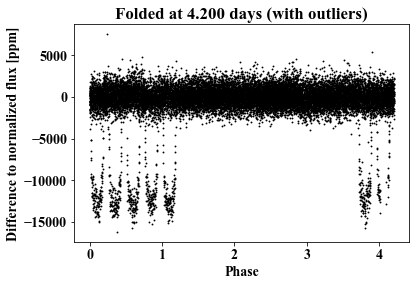

2019-11-18 15:34:29,387 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:29,405 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:29,406 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:34:29,995 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:30,012 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:30,013 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


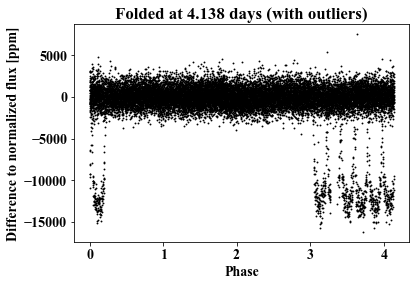

2019-11-18 15:34:30,653 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:30,673 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:30,675 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:34:31,208 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:31,230 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:31,231 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


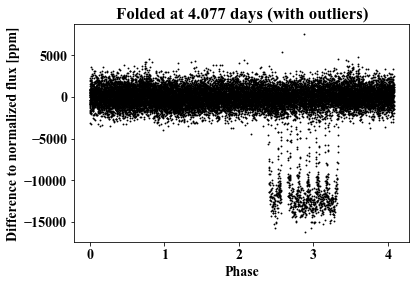

2019-11-18 15:34:32,036 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:32,068 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:32,070 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:34:32,692 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:32,720 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:32,721 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


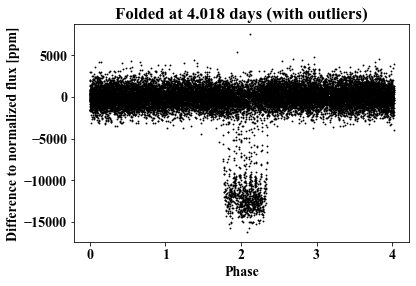

2019-11-18 15:34:33,403 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:33,422 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:33,423 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:34:34,027 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:34,047 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:34,049 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


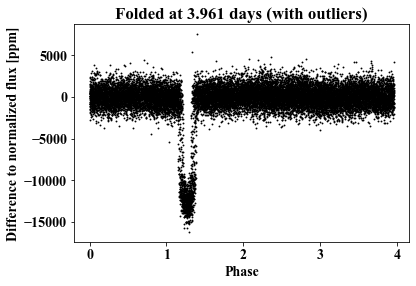

2019-11-18 15:34:34,814 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:34,841 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:34,842 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:34:35,377 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:35,394 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:35,396 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


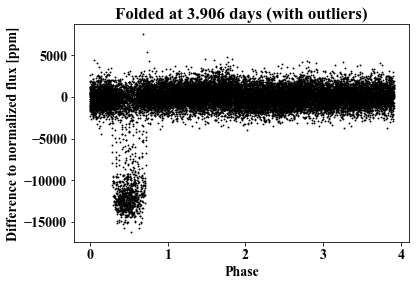

2019-11-18 15:34:36,087 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:36,107 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:36,109 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:34:36,647 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:36,665 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:36,666 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


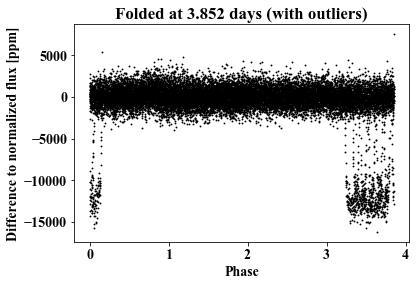

[4.2,
 4.1376374607581035,
 4.077099771591672,
 4.018307989481871,
 3.9611876601163045,
 3.9056685033252827,
 3.851684124605596]

In [10]:
time = max(lc.time)-min(lc.time)
lcTransit = lc.copy()
def gridfreq(lc, N=10):
    periods=[]
    phases=[]
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period)
        plt.scatter(phase, (lcTransit.flux-1.)*1e6, marker=".", color="k", s=3)
        plt.title("Folded at {} days".format('%.3f'%(period))+' (with outliers)')
        plt.xlabel("Phase")
        plt.ylabel("Difference to normalized flux [ppm]")
        plt.savefig(os.path.join(downloadDir,"PhaseFold_beforeout{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
        phases.append(phase)
    return periods


gridfreq(lcTransit)

2019-11-18 15:34:38,148 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:38,173 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:38,174 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:34:39,446 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:39,478 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:39,479 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


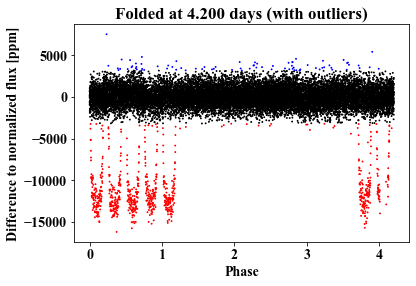

2019-11-18 15:34:41,329 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:41,358 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:41,360 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:34:42,581 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:42,598 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:42,598 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


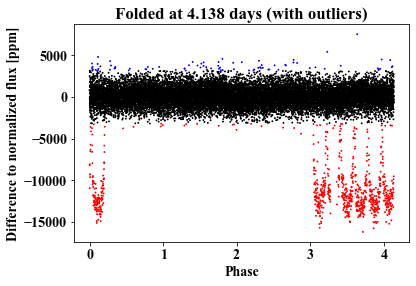

2019-11-18 15:34:44,511 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:44,533 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:44,535 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:34:45,675 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:45,692 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:45,693 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


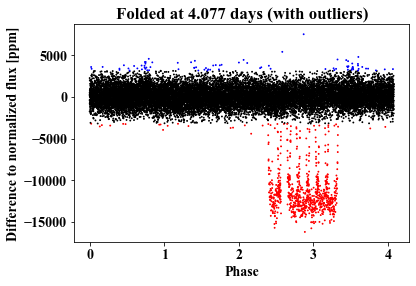

2019-11-18 15:34:47,484 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:47,503 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:47,504 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:34:48,578 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:48,595 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:48,596 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


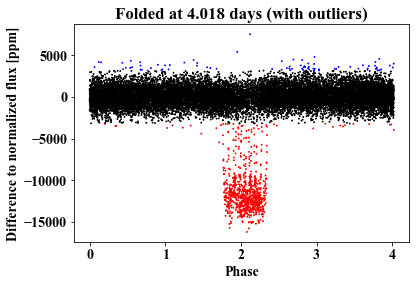

2019-11-18 15:34:50,389 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:50,409 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:50,410 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:34:51,482 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:51,498 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:51,500 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


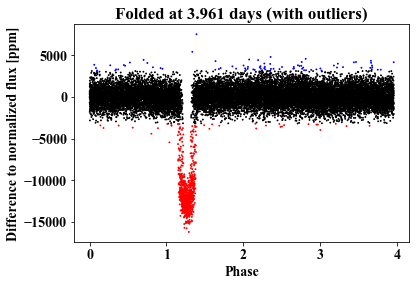

2019-11-18 15:34:53,289 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:53,307 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:53,308 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:34:54,340 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:54,357 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:54,359 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


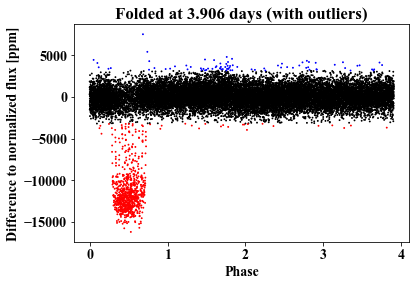

2019-11-18 15:34:56,203 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:56,222 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:56,222 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:34:57,260 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:57,276 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:57,277 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


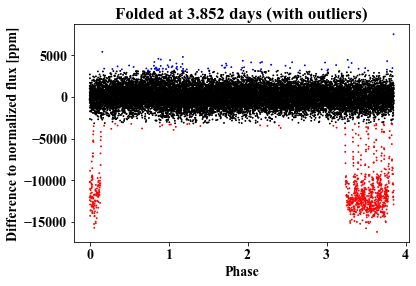

[4.2,
 4.1376374607581035,
 4.077099771591672,
 4.018307989481871,
 3.9611876601163045,
 3.9056685033252827,
 3.851684124605596]

In [11]:
time = max(lc.time)-min(lc.time)
lcTransit = lc.copy()
def gridfreq_col(lc, N=10):
    periods=[]
    phases=[]
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period)
        
        flux_nomad = lc.flux-1
        mad = stats.median_absolute_deviation(lc.flux)
        std = np.std(flux_nomad)
        
        col = ['k']*len(phase)
        col = np.array(col)
        col[np.where(flux_nomad >= 4*mad)] = 'b'
        col[np.where(flux_nomad <= -4*mad)] = 'r'
        ind_norm = np.where(col == 'k')
        ind_outl_pos = np.where(col == 'b')
        ind_outl_neg = np.where(col == 'r')
        
        #Now plot number of outliers PER WINDOW, and see if this it matches with the colored light curve.
        
        ##Outlier removal below
        #flux_mad = np.where(flux_nomad > 2*mad, 0, flux_nomad)
        ##Outlier removal above
        
        plt.scatter(phase, (lcTransit.flux-1.)*1e6, marker=".", color=col, s=3)
        plt.title("Folded at {} days".format('%.3f'%(period))+' (with outliers)')
        plt.xlabel("Phase")
        plt.ylabel("Difference to normalized flux [ppm]")
        plt.savefig(os.path.join(downloadDir,"PhaseFold_markedout{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
        phases.append(phase)
    return periods

gridfreq_col(lcTransit)



## Removal of Outliers (with astropy)

2019-11-18 15:34:58,310 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:58,329 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:58,330 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:34:58,807 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:58,822 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:58,823 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


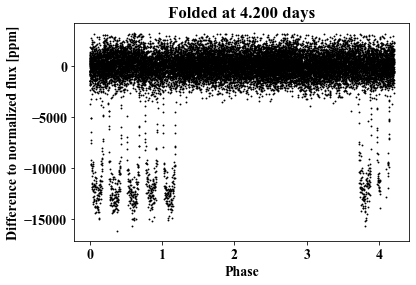

2019-11-18 15:34:59,414 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:59,431 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:59,433 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:34:59,905 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:34:59,921 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:34:59,922 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


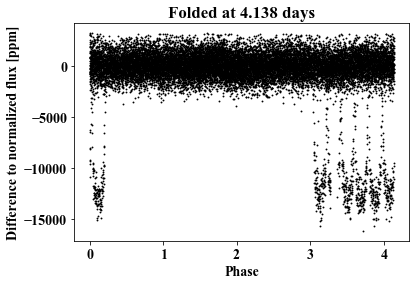

2019-11-18 15:35:00,510 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:35:00,528 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:35:00,528 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:35:01,028 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:35:01,044 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:35:01,044 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


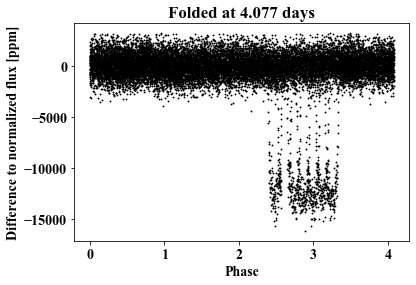

2019-11-18 15:35:01,631 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:35:01,648 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:35:01,649 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:35:02,125 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:35:02,141 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:35:02,142 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


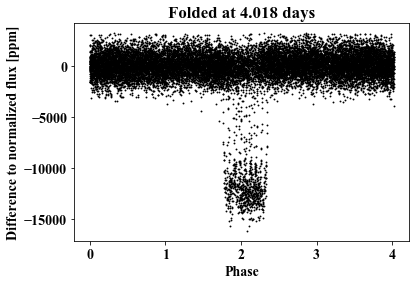

2019-11-18 15:35:02,725 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:35:02,743 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:35:02,744 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:35:03,214 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:35:03,229 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:35:03,229 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


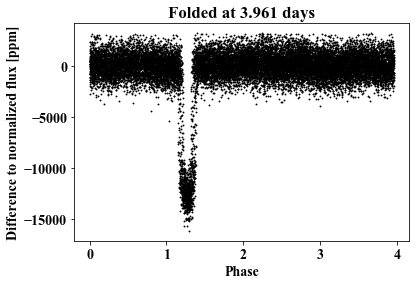

2019-11-18 15:35:03,807 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:35:03,825 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:35:03,825 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:35:04,298 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:35:04,314 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:35:04,315 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


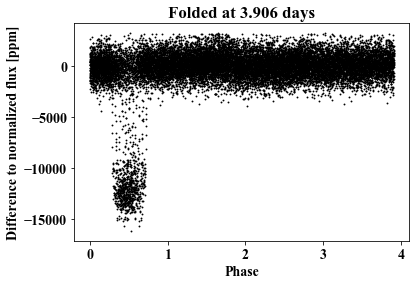

2019-11-18 15:35:04,892 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:35:04,909 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:35:04,910 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:35:05,377 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:35:05,392 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:35:05,393 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


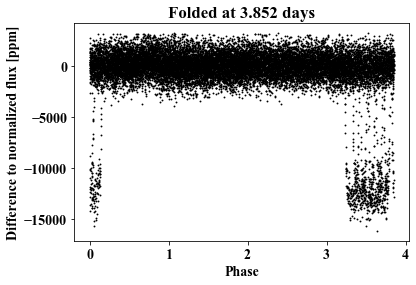

[4.2,
 4.1376374607581035,
 4.077099771591672,
 4.018307989481871,
 3.9611876601163045,
 3.9056685033252827,
 3.851684124605596]

In [12]:
lcTransit = lc.copy()
def gridfreq(lc,N=10):
    periods=[]
    phases=[]
    time = max(lc.time)-min(lc.time)
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period)
        ##Outlier removal below
        flux_nomad = lc.flux-1
        mad = stats.median_absolute_deviation(flux_nomad)
        flux_mad = np.where(flux_nomad > 4*mad, 0, flux_nomad)
        ##Outlier removal above
        plt.scatter(phase, (flux_mad)*1e6, marker=".", color="k", s=3)
        plt.title("Folded at {} days".format('%.3f'%(period)))
        plt.xlabel("Phase")
        plt.ylabel("Difference to normalized flux [ppm]")
        plt.savefig(os.path.join(downloadDir,"PhaseFold_{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
        phases.append(phase)
    return periods

gridfreq(lcTransit)

In [13]:
def window1(a, w=100, o=10, copy=False):
    sh = (a.size - w + 1, w)
    st = a.strides * 2
    print(a.strides)
    view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::o]
    if copy:
        return view.copy()
    else:
        return view
    #return (o-w, o+w)
    
#def window2(a, startpos):
    #a[N:N+11]
    
def count1(a, mad, std):
    firstapps = []
    #firstapp = (mad-lc)/std
    firstapp = (a - mad)/std
    for i in range (0, len(firstapp)):
        if firstapp[i] < std:
            firstapp[i] = 1
        else:
            firstapp[i] = 0
    firstapps.append(firstapp)
    outlier_count = np.count_nonzero(firstapps)
    return outlier_count

In [14]:
N = 10 
dt=5
time = max(lc.time)-min(lc.time)
dt = dt/24 #converting to day
period = 3.9611876601163045
phase = (lc.time % period)

##Binning below
#s = period / dt
#lcB = lc.bin(binsize=s, method='median') #Do not bin until neg outliers are removed
#phasebin = (lcB.time % period) #Do not bin until neg outliers are removed
##Binninng above
                    
## +Outlier removal below
flux_nomad = lc.flux-1
mad = stats.median_absolute_deviation(flux_nomad)
flux_mad = np.where(flux_nomad > 2*mad, 0, flux_nomad)
## +Outlier removal above
    
## -Outlier removal below
    
std = np.std(flux_nomad)
windows = window1(flux_nomad)
#print((mad-windows[5])/std)
count1(windows[5], mad, std)

#firstapps=[]
#for i in range(0, 11):
    #for j in range(0, len(windows[3])):
    #firstapp = (mad - windows[3][j])/std
    #firstapps.append(firstapp)
#return firstapps
    
## -Outlier removal above


(4,)


76

In [15]:
x = np.linspace(0, len(windows), num=len(windows))
y = []
for i in range (0, len(windows)):
    ys = count(windows[i], mad, std)
    y.append(ys)
#print(y)
#plt.plot(x, y, c='k')
#plt.title('Counting Negative Outliers (window width = 50)')
#plt.ylabel('Number of Outliers')
#plt.xlabel('Position of Window')
#plt.savefig(os.path.join(downloadDir,"CountOut3.pdf"), bbox_inches='tight')
#plt.show()

NameError: name 'count' is not defined

## Binning

2019-11-18 15:36:45,836 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:36:45,857 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:36:45,857 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:36:45,938 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:36:45,955 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:36:45,956 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


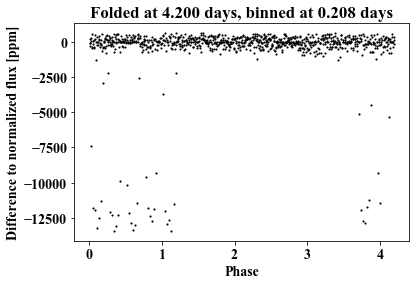

2019-11-18 15:36:46,198 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:36:46,223 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:36:46,224 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:36:46,304 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:36:46,323 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:36:46,324 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


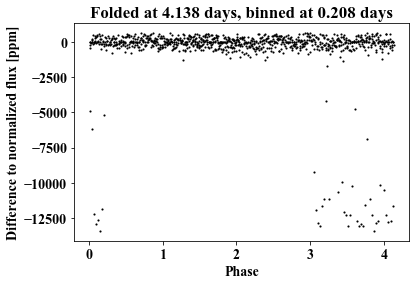

2019-11-18 15:36:46,568 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:36:46,590 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:36:46,591 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:36:46,679 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:36:46,698 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:36:46,699 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


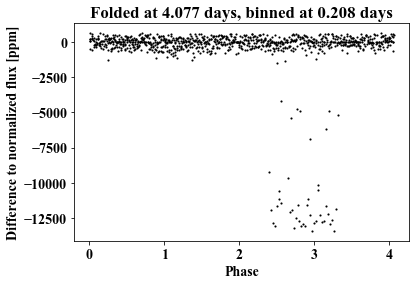

2019-11-18 15:36:46,946 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:36:46,969 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:36:46,969 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:36:47,049 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:36:47,067 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:36:47,068 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


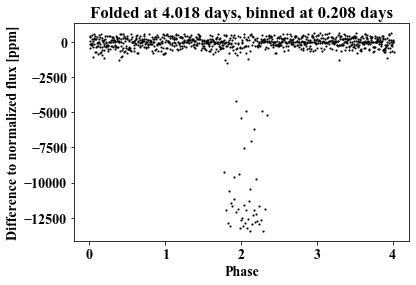

2019-11-18 15:36:47,307 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:36:47,328 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:36:47,328 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:36:47,407 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:36:47,424 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:36:47,425 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


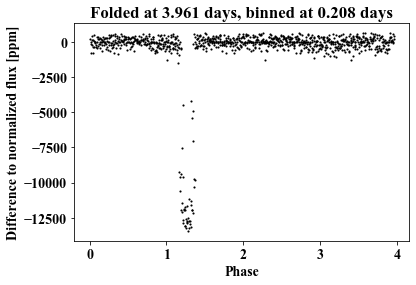

2019-11-18 15:36:47,667 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:36:47,688 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:36:47,689 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:36:47,769 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:36:47,786 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:36:47,787 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


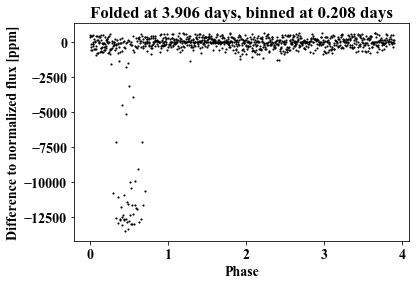

2019-11-18 15:36:48,040 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:36:48,065 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:36:48,065 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:36:48,150 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:36:48,169 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:36:48,170 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


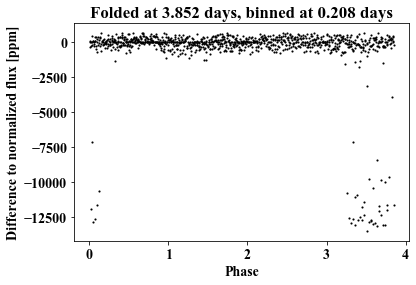

[4.2,
 4.1376374607581035,
 4.077099771591672,
 4.018307989481871,
 3.9611876601163045,
 3.9056685033252827,
 3.851684124605596]

In [16]:
def meandt(lc, N=10, dt=5):
    periods = []
    time = max(lc.time)-min(lc.time)
    dt = dt/24 #converting to day
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        
        ##Binning below
        s = period / dt
        lcB = lc.bin(binsize=s, method='median')
        phasebin = (lcB.time % period)
        ##Binninng above
                    
        ##Outlier removal below
        flux_nomad = lcB.flux-1
        mad = stats.median_absolute_deviation(flux_nomad)
        flux_mad = np.where(flux_nomad > 2*mad, 0, flux_nomad)
        ##Outlier removal above
    
        plt.scatter(phasebin, (flux_mad)*1e6, marker=".", color="k", s=5)
        plt.title("Folded at {} days".format('%.3f'%(period))+', binned at {} days'.format('%.3f'%(dt)))
        plt.xlabel("Phase")
        plt.ylabel("Difference to normalized flux [ppm]")
        plt.savefig(os.path.join(downloadDir,"PhaseFoldBin_{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
    return periods

meandt(lc)


## Window Sliding

In [17]:
def window(a, w=50, o=5, copy=False):
    sh = (a.size - w + 1, w)
    st = a.strides * 2
    view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::o]
    if copy:
        return view.copy()
    else:
        return view
    #return (o-w, o+w)
    
#def window2(a, startpos):
    #a[N:N+11]
    
def count2(a, mad):
    firstapps = []
    #firstapp = (mad-lc)/std
    #firstapp = (a - mad)/std
    #firstapp = a
    firstapp = np.zeros(len(a))
    for i in range (0, len(a)):
        if a[i] <= -4*mad:
            firstapp[i] = 1
        else:
            firstapp[i] = 0
    firstapps.append(firstapp)
    outlier_count = np.count_nonzero(firstapp)
    return outlier_count

def count3(a, mad):
    firstapps = []
    firstapp = a
    firstapp[np.where(a >= 4*mad)] = 0
    firstapp[np.where(a <= -4*mad)] = 1
    outlier_count = np.count_nonzero(firstapp)
    return outlier_count


In [18]:
#col = ['k']*len(phase)
        #col = np.array(col)
        #col[np.where(flux_nomad >= 4*mad)] = 'b'
        #col[np.where(flux_nomad <= -4*mad)] = 'r'
        #ind_norm = np.where(col == 'k')
        #ind_outl_pos = np.where(col == 'b')
        #ind_outl_neg = np.where(col == 'r')

(185, 30)
185


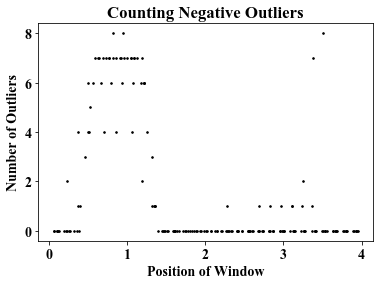

In [19]:
N = 10 
dt=5
time = max(lc.time)-min(lc.time)
dt = dt/24 #converting to day
period = 3.9611876601163045
        
##Binning below
s = period / dt
lcB = lc.bin(binsize=s, method='median')
phasebin = (lcB.time % period)
##Binninng above
                    
## +Outlier removal below
flux_nomad = lcB.flux-1
MAD = stats.median_absolute_deviation(flux_nomad)
#print(MAD)
flux_mad = np.where(flux_nomad >= 4*mad, 0, flux_nomad)
## +Outlier removal above
    
## -Outlier removal below
    
col = [0]*len(phasebin)
col = np.array(col)
col[np.where(flux_nomad <= -4*MAD)] = 1 #'r'
#print(len(col))
windows = window(col, w=30, o=5)
windows_phase = window(phasebin, w=30, o=5)
#print(len(windows))
#print(windows[200])
counts = []
for j in range(0, len(windows)):
    outlier_count = np.count_nonzero(windows[j])
    counts.append(outlier_count)
    #Counting neg outlier above
## -Outlier removal above

x = np.linspace(0, len(windows), num=len(windows))
print(windows_phase.shape)
print(len(counts))
#plt.scatter(phasebin, (flux_mad)*1e6, marker=".", color="k", s=5)
plt.scatter(windows_phase[:,0], counts, marker=".", color="k", s=10)
plt.title('Counting Negative Outliers')
plt.ylabel('Number of Outliers')
plt.xlabel('Position of Window')
#plt.savefig(os.path.join(downloadDir,"CountOut3.pdf"), bbox_inches='tight')
plt.show()


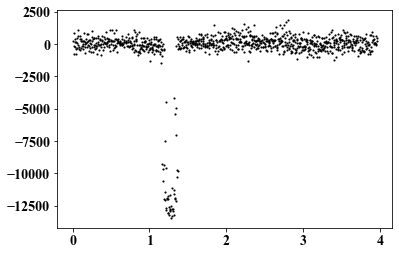

In [20]:
plt.scatter(phasebin, (flux_mad)*1e6, marker=".", color="k", s=5)

## Counting Outliers In Terms of Phase (Works!)

2019-11-18 15:37:16,401 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:37:16,421 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:37:16,422 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:37:16,553 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:37:16,572 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:37:16,572 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


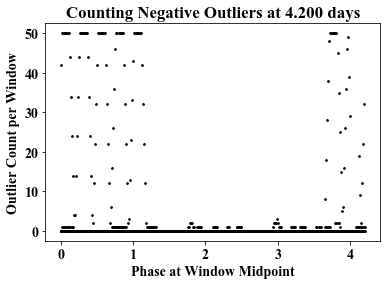

2019-11-18 15:37:16,762 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:37:16,780 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:37:16,781 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:37:16,879 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:37:16,895 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:37:16,896 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


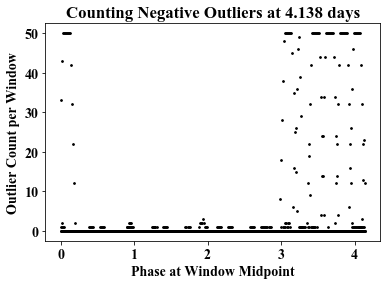

2019-11-18 15:37:17,084 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:37:17,104 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:37:17,105 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:37:17,202 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:37:17,218 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:37:17,219 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


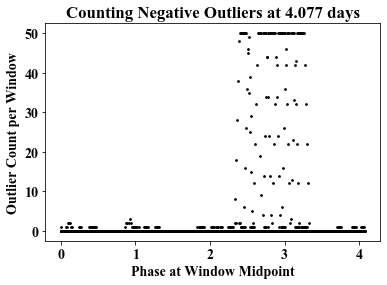

2019-11-18 15:37:17,406 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:37:17,426 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:37:17,428 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:37:17,532 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:37:17,551 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:37:17,552 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


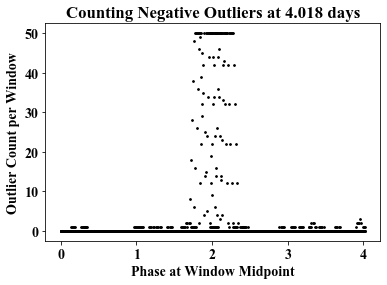

2019-11-18 15:37:17,754 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:37:17,775 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:37:17,775 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:37:17,875 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:37:17,893 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:37:17,894 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


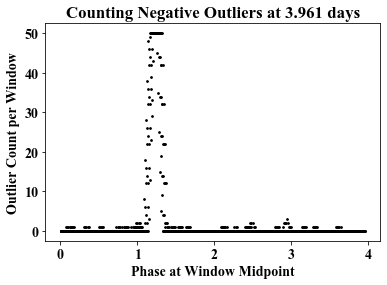

2019-11-18 15:37:18,162 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:37:18,183 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:37:18,184 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:37:18,284 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:37:18,300 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:37:18,301 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


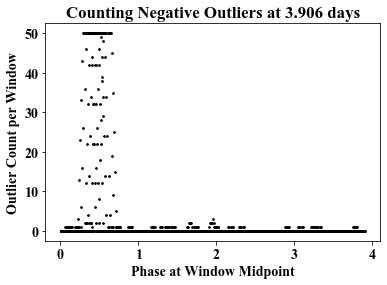

2019-11-18 15:37:18,493 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:37:18,513 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:37:18,515 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:37:18,620 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:37:18,642 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:37:18,643 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


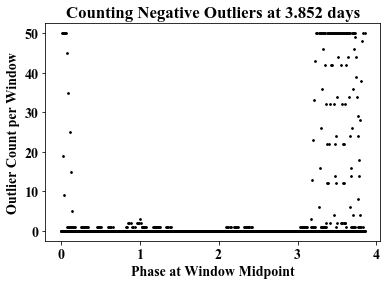

[4.2,
 4.1376374607581035,
 4.077099771591672,
 4.018307989481871,
 3.9611876601163045,
 3.9056685033252827,
 3.851684124605596]

In [24]:
def gridfreqcount(lc,N=10):
    periods=[]
    phases=[]
    time = max(lc.time)-min(lc.time)
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period)
        
        ## Pos outlier removal below
        flux_nomad = lc.flux-1
        MAD = stats.median_absolute_deviation(flux_nomad)
        flux_mad = np.where(flux_nomad > 4*mad, 0, flux_nomad)
        ## Pos outlier removal above
        
        ##Counting neg outlier below
        col = [0]*len(phase)
        col = np.array(col)
        col[np.where(flux_nomad <= -4*MAD)] = 1 #'r'
        #print(len(col))
        windows = window(col, w=50, o=10)
        window_phase = window(phase, w=50, o=10)
        #print(windows[200])
        counts = []
        for j in range(0, len(windows)):
            outlier_count = np.count_nonzero(windows[j])
            counts.append(outlier_count)
        ##Counting neg outlier above
        
        #print(len(counts))
        plt.scatter(window_phase[:,0], counts, marker="o", color="k", s=3)
        #plt.scatter(phase, (flux_mad)*1e6, marker=".", color="k", s=3)
        plt.title("Counting Negative Outliers at {} days".format('%.3f'%(period)))
        plt.xlabel("Phase at Window Midpoint")
        plt.ylabel("Outlier Count per Window")
        plt.savefig(os.path.join(downloadDir,"NegCount_{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
        phases.append(phase)
    return periods

gridfreqcount(lcTransit)

## Applying CDF to the Outlier Count

2019-11-18 15:41:33,116 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:41:33,134 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:41:33,135 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:41:33,213 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:41:33,229 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:41:33,230 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


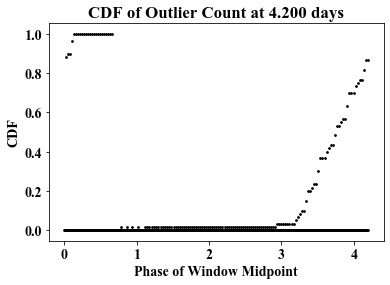

2019-11-18 15:41:33,387 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:41:33,406 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:41:33,407 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:41:33,484 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:41:33,499 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:41:33,500 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


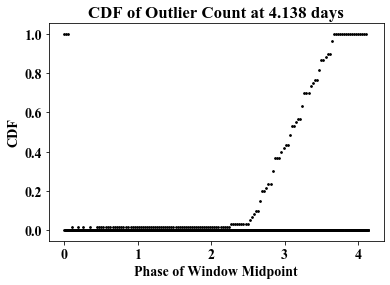

2019-11-18 15:41:33,656 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:41:33,676 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:41:33,677 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:41:33,756 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:41:33,772 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:41:33,772 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


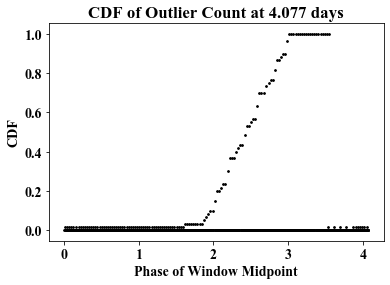

2019-11-18 15:41:33,929 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:41:33,948 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:41:33,950 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:41:34,029 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:41:34,044 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:41:34,045 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


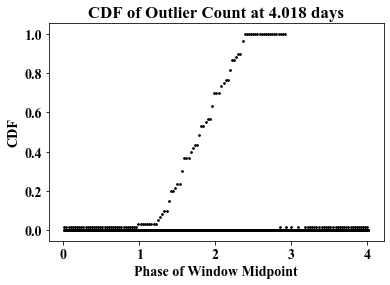

2019-11-18 15:41:34,210 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:41:34,231 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:41:34,232 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:41:34,314 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:41:34,333 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:41:34,335 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


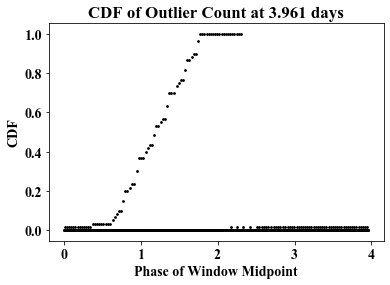

2019-11-18 15:41:34,508 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:41:34,528 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:41:34,530 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:41:34,614 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:41:34,630 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:41:34,631 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


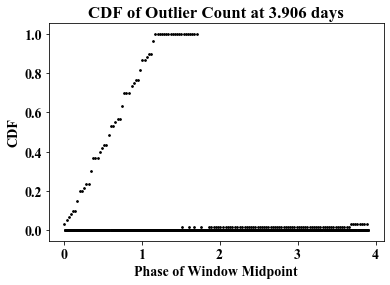

2019-11-18 15:41:34,795 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:41:34,820 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:41:34,821 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-18 15:41:34,905 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-18 15:41:34,924 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-18 15:41:34,925 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


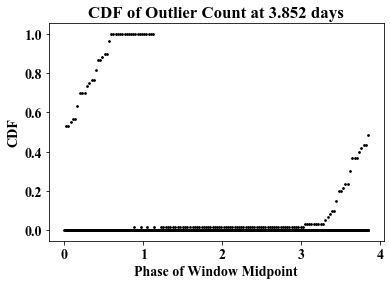

[4.2,
 4.1376374607581035,
 4.077099771591672,
 4.018307989481871,
 3.9611876601163045,
 3.9056685033252827,
 3.851684124605596]

In [25]:
def countcdf(lc,N=10):
    periods=[]
    phases=[]
    time = max(lc.time)-min(lc.time)
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period)
        
        ## Pos outlier removal below
        flux_nomad = lc.flux-1
        MAD = stats.median_absolute_deviation(flux_nomad)
        flux_mad = np.where(flux_nomad > 4*mad, 0, flux_nomad)
        ## Pos outlier removal above
        
        ##Counting neg outlier below
        col = [0]*len(phase)
        col = np.array(col)
        col[np.where(flux_nomad <= -4*MAD)] = 1 #'r'
        #print(len(col))
        windows = window(col, w=60, o=20)
        window_phase = window(phase, w=60, o=20)
        counts = []
        for j in range(0, len(windows)):
            outlier_count = np.count_nonzero(windows[j])
            counts.append(outlier_count)
        ##Counting neg outlier above
        
        ##CDF below
        
        c_cdf = np.sort(counts)
        #p_cdf = np.sort(window_phase[:,0])
        #y_cdf = np.arange(1, len(x_cdf)+1) / len(x_cdf)
        
        ##CDF above
        
        plt.scatter(window_phase[:,0], c_cdf/c_cdf[-1], marker="o", color="k", s=3)
        #plt.plot(c_cdf, 0.5)
        plt.title("CDF of Outlier Count at {} days".format('%.3f'%(period)))
        plt.xlabel("Phase of Window Midpoint")
        plt.ylabel("CDF")
        plt.savefig(os.path.join(downloadDir,"CountCDF_{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
        phases.append(phase)
    return periods

countcdf(lcTransit)

## Polynomial Fit of CDF

In [119]:
def countpolyfit(lc,N=10):
    periods=[]
    phases=[]
    time = max(lc.time)-min(lc.time)
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period)
        
        ## Pos outlier removal below
        flux_nomad = lc.flux-1
        MAD = stats.median_absolute_deviation(flux_nomad)
        flux_mad = np.where(flux_nomad > 4*mad, 0, flux_nomad)
        ## Pos outlier removal above
        
        ##Counting neg outlier below
        col = [0]*len(phase)
        col = np.array(col)
        col[np.where(flux_nomad <= -4*MAD)] = 1 #'r'
        #print(len(col))
        windows = window(col, w=60, o=20)
        window_phase = window(phase, w=60, o=20)
        x = window_phase[:,0]
        counts = []
        for j in range(0, len(windows)):
            outlier_count = np.count_nonzero(windows[j])
            counts.append(outlier_count)
        ##Counting neg outlier above
        
        ##CDF below
        c_cdf = np.sort(counts)
        y = c_cdf/c_cdf[-1]
        ##CDF above
        
        ##Polyfit below
        z = np.polyfit(x, y, deg=4) #test with deg=0 to see if the mean of the cdf appears
        poly = np.poly1d(z)
        print(poly)
        xp = np.linspace(0, len(x), num=(len(x))
        yp = poly(xp) #indentation error
        ##Polyfit above
        
        plt.scatter(x, y, marker="o", color="k", s=3)
        plt.plot(xp, yp, 'b-')
        #plt.xlim(0,4.2)
        #plt.ylim(-0.1,1.1)
        plt.title("CDF of Outlier Count at {} days".format('%.3f'%(period)))
        plt.xlabel("Phase of Window Midpoint")
        plt.ylabel("CDF")
        plt.savefig(os.path.join(downloadDir,"CountCDF_{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
        phases.append(phase)
    return periods

countpolyfit(lcTransit)

SyntaxError: invalid syntax (<ipython-input-119-c8c5b09c5058>, line 39)